<a href="https://colab.research.google.com/github/juliakahan/Machine-Learning-/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
data_breast_cancer = datasets.load_breast_cancer(as_frame=True) 
print(data_breast_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [2]:
X_cancer = data_breast_cancer["data"][["mean texture", "mean symmetry"]]
y_cancer = data_breast_cancer["target"]

X_cancer
y_cancer

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

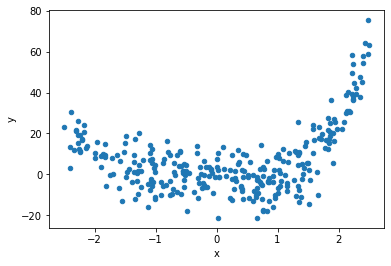

In [3]:
import numpy as np
import pandas as pd
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4 
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

In [4]:
from sklearn.model_selection import train_test_split
X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(X_cancer, y_cancer, test_size=0.2)

In [5]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_cancer_train, y_cancer_train)

DecisionTreeClassifier(max_depth=3)

In [6]:
y_cancer_train_pred = tree_clf.predict(X_cancer_train)
y_cancer_test_pred = tree_clf.predict(X_cancer_test)

In [7]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

y_cancer_train_f1_score = f1_score(y_cancer_train, y_cancer_train_pred)
y_cancer_test_f1_score = f1_score(y_cancer_test, y_cancer_test_pred)

cancer_train_accuracy = accuracy_score(y_cancer_train, y_cancer_train_pred)
cancer_test_accuracy = accuracy_score(y_cancer_test, y_cancer_test_pred)

print("f1_train: ", y_cancer_train_f1_score) 
print("f1_test: ", y_cancer_test_f1_score)


print("accuracy_train: ", cancer_train_accuracy)
print("accuracy_test: ",cancer_test_accuracy)

mdc = 3

f1_train:  0.7817460317460317
f1_test:  0.7153284671532847
accuracy_train:  0.7582417582417582
accuracy_test:  0.6578947368421053


In [8]:
from sklearn.tree import export_graphviz
f = "bc"
export_graphviz(
        tree_clf,
        out_file=f,
        feature_names=["mean texture", "mean symmetry"],
        class_names=[str(num)+", "+name
                     for num,name in
                     zip(set(data_breast_cancer.target), data_breast_cancer.target_names)],
        rounded=True,
        filled=True)

In [9]:
import graphviz
print(graphviz.render('dot', 'png', f))

bc.png


In [10]:
f1acc_tree = [mdc, y_cancer_train_f1_score, y_cancer_test_f1_score, cancer_train_accuracy, cancer_test_accuracy]
f1acc_tree

[3,
 0.7817460317460317,
 0.7153284671532847,
 0.7582417582417582,
 0.6578947368421053]

In [11]:
import pickle
with open('f1acc_tree.pkl', 'wb') as fp:
    pickle.dump(f1acc_tree, fp)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
from sklearn.tree import DecisionTreeRegressor

In [14]:
X_train = X_train.reshape(-1,1)
X_test  = X_test.reshape(-1,1)

In [15]:
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [16]:
y_train_pred = tree_reg.predict(X_train)
y_test_pred = tree_reg.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_train_pred)
print(train_mse)
test_mse = mean_squared_error(y_test, y_test_pred)
print(test_mse)

92.13844703394783
86.07662896754091


In [20]:
tree_reg4 = DecisionTreeRegressor(max_depth=4)
tree_reg4.fit(X_train, y_train)

y_train_pred4 = tree_reg4.predict(X_train)
y_test_pred4 = tree_reg4.predict(X_test)

In [31]:
train_mse4 = mean_squared_error(y_train, y_train_pred4)
print(train_mse4)
test_mse4 = mean_squared_error(y_test, y_test_pred4)
print(test_mse4)

59.64398915414742
66.13841025008338


In [34]:
mse_tree = [4, train_mse4, test_mse4]
mse_tree


[4, 59.64398915414742, 66.13841025008338]

In [35]:
with open('mse_tree.pkl', 'wb') as fp:
    pickle.dump(mse_tree, fp)